# Introduction to object oriented Python

Everything in Python is an object: variables, raw types, functions, everything.

Sometimes it's useful to organize code around data — to think of a type of data as owning its own functions and metadata. In essence, we store data along with relevant functions (methods) in one 'thing' — an object. You can also think of this as writing your own 'types'.

You can also build very complicated code this way, so be careful! Don't dive into writing classes until you've used Python for a while and start to see how most people use objects in Python. 

This notebook builds on the workflow in [Intro to PYthon](Intro_to_Python.ipynb), so you shoudl be sure to look at that notebook first.

## Types

Python has several types, many of which you're already familiar with.

In [1]:
type(5)

int

In [2]:
type('fifteen'), type('15')

(str, str)

'fifteen' is an **instance** of the class **str**.

Most of these objects have methods, which are just functions that 'belong' to the class:

In [3]:
'fifteen'.find('t')  # Call the method `find` on the string

3

In [4]:
import numpy as np

a = np.array([1,2,3,4,5,6])

a

array([1, 2, 3, 4, 5, 6])

In [5]:
a.mean()

3.5

In [6]:
lst = [1,3,4,5,7,8]
lst.append(1000)
lst

[1, 3, 4, 5, 7, 8, 1000]

## A simple class

In [7]:
layers = [0.23, 0.34, 0.45, 0.25, 0.23, 0.35]

Start with only one special method: `__init__()` which is required anyway.

Inside `__init__()` we'll only define one **attribute**, `self.layers`.

In [8]:
import numpy as np

class Layers(object):
    
    def __init__(self, layers):
        
        self.layers = np.array(layers)

Now we can **instantiate** an instance of the class **Layers**

In [9]:
l = Layers(layers=layers)

In [10]:
l

In [11]:
l.layers

array([0.23, 0.34, 0.45, 0.25, 0.23, 0.35])

In [12]:
dir(l)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'layers']

At this point, we might as well just have an array, like we had before. So let's add another attribute, let's give the object a natural language name called `label`:

In [13]:
class Layers(object):
    
    def __init__(self, layers, label=None):  # We use a default value of None

        self.layers = np.array(layers)
        self.label = label or "My log"  # This trick substitutes anything evaluating as False with 'My log'

In [14]:
l = Layers(layers, label='Well 1')

In [15]:
l.label

'Well 1'

## Magic methods

Let's find out how big our fancy `Layers` object is...

In [16]:
len(l)

TypeError: object of type 'Layers' has no len()

Dammit!

The class inherited from `object` when we defined it, and it doesn't know how to apply `len` to our thing. We could do this...

In [ ]:
len(l.layers)

But sometimes we'd like something to 'just work' — maybe later we're going to pass our instances to something that can take lists or our new objects, and that thing might call `len()` on our object. 

That's why this also doesn't help:

In [17]:
class Layers(object):
    def __init__(self, layers, label=None):
        self.layers = np.array(layers)
        self.label = label or "My log"
        self.length = self.layers.size

In [18]:
l = Layers(layers, label='Well 1')

In [19]:
l.length

6

What's more, storing length in an attribute like this is unexpected...

So we tell it with a so-called 'dunder' (double-underscore) or ['magic' method](https://docs.python.org/3/reference/datamodel.html) (not to be confused with IPython magics). That way, we can give our object the same interface as typical Python objects.

In [20]:
class Layers(object):
    def __init__(self, layers, label=None): 
        self.layers = np.array(layers)
        self.label = label or "My log"

    def __len__(self):
        return len(self.layers)
    
    def foo(x):
        print(x)
        return

In [21]:
l = Layers(layers)

In [22]:
l.label

'My log'

In [23]:
l.foo()

In [24]:
l = Layers(layers, label='Well 1')
len(l)

6

Another useful magic method is `__repr__()`. Right now all we see when we do `l` on its own is:

In [25]:
l

A similar method `__str__()` defines what happens if we cast the object to a `str` type — which is also what happens to it if we call `print()` on it.

- The goal of `__repr__` is to be unambiguous
- The goal of `__str__` is to be readable


By default, `str` does the same as `repr`:

In [26]:
print(l)

<div class="alert alert-success">
<h3>Exercise:</h3>

- Try writing a `__str__()` method. Keep it simple. It should return `Layers(6 layers)` when you print our 6-layer instance on the command line.
- Try writing a `__repr__()` method. It should return the code required to instantiate the object. It should return `Layers(layers=array([0.23, 0.34, 0.45, 0.25, 0.23, 0.35]), label="Well 1")` when you type the name of our 6-layer instance on the command line.
- **Hint.** You might want to use `repr()` on the internal `self.layers` object to get a representation of it for your `repr`.
</div>

In [27]:
class Layers(object):
    def __init__(self, layers, label=None): 
        self.layers = np.array(layers)
        self.label = label or "My log"

    def __len__(self):
        return len(self.layers)
        
    
    def __repr__(self):
        return "Layers(layers={}, label={})".format(self.layers.__repr__(), self.label)
    
    def _repr_html_(self):
        return format(self.layers)
        
    def __str__(self):
        return "Layers({} layers)".format(len(self.layers))
    

In [28]:
l = Layers(layers)

In [29]:
l

Layers(layers=array([0.23, 0.34, 0.45, 0.25, 0.23, 0.35]), label=My log)

A handy extra magic method in Jupyter notebook is `_repr_html_()` which tells the notebook what to use for `repr()` — it overrides `__repr__()` when you're in the notebook.

In [30]:
class Layers(object):
    def __init__(self, layers, label=None):
        self.layers = np.array(layers)
        self.label = label or "My log"
        self.length = self.layers.size
        
    def __len__(self):
        return len(self.layers)

    def _repr_html_(self):
        rows = "<tr><th>{}</th></tr>".format(self.label)
        rows += "<tr><td>"
        layer_strs = [str(i) for i in self.layers]
        rows += "</td></tr><tr><td>".join(layer_strs)
        rows += "</td></tr>"
        html = "<table>{}</table>".format(rows)
        return html

In [31]:
l = Layers(layers, label='Well 1')
l

Well 1
0.23
0.34
0.45
0.25
0.23
0.35


<div class="alert alert-success">
<h3>Exercise</h3>

- Try writing a method that allows you to do layers1 + layers2. You will need to define an `__add__()` method. It should return the result ofthe concatenation.
- Use `np.hstack([arr1, arr2])` to stack the arrays containing the data. Form some kind of new label.
</div>

In [32]:
class Layers(object):
    def __init__(self, layers, label=None):
        self.layers = np.array(layers)
        self.label = label or "My log"
        self.length = self.layers.size
        
    def __len__(self):
        return len(self.layers)

    def __add__(self, other):
        new_layers = np.hstack([self.layers, other.layers])
        new_label = "{}, {}".format(self.label, other.label)
        return Layers(new_layers, label = new_label)
    
    def _repr_html_(self):
        rows = "<tr><th>{}</th></tr>".format(self.label)
        rows += "<tr><td>"
        layer_strs = [str(i) for i in self.layers]
        rows += "</td></tr><tr><td>".join(layer_strs)
        rows += "</td></tr>"
        html = "<table>{}</table>".format(rows)
        return html

In [33]:
l2 = Layers([1,2,3], "First") + Layers([4,5,6], "Second")

### Properties

In [34]:
a

array([1, 2, 3, 4, 5, 6])

In [35]:
a.size

6

In [36]:
class Layers(object):
    def __init__(self, layers, label=None):
        self.layers = np.array(layers)
        self.label = label or "My log"
        self.length = self.layers.size
        
    def __len__(self):
        return len(self.layers)
    #class attribute, eg defining a constand
    radius_of_earth = 6371
    
    #A property looks likea n attribute but gets self to get data from
    @property
    def size(self):
        return np.mean(self.layers)

In [37]:
l = Layers(layers, label='Well 1')

In [38]:
l.radius_of_earth

6371

In [39]:
l.size

0.30833333333333335

#### inheritance

In [40]:
class Layers(list):
    def __init__(self, layers, label=None):
        super().__init__(layers)
        self.label = label or "My log"

In [41]:
layers

[0.23, 0.34, 0.45, 0.25, 0.23, 0.35]

In [42]:
l = Layers(layers, "subclass of list")

In [43]:
l

[0.23, 0.34, 0.45, 0.25, 0.23, 0.35]

In [44]:
len(l)

6

In [45]:
l.append(777)

In [46]:
l

[0.23, 0.34, 0.45, 0.25, 0.23, 0.35, 777]

## Constructor methods

It can be handy to have several ways to instantiate a class, rather than knowing you'll pass a list (say). 

Let's make a CSV file and write a special method to read those. Even though this is only a 1D dataset, I'll make it more interesting — and more like what you'll normally encounter — by assuming we're reading lots of rows from the CSV.

In [47]:
layers

[0.23, 0.34, 0.45, 0.25, 0.23, 0.35]

In [48]:
import csv

with open('../data/my_layers.csv', 'w') as f:
    writer = csv.writer(f, lineterminator='\n')
    for row in layers:
        writer.writerow([row])  # Have to form a list b/c it's just a 1D array.

In [49]:
with open('../data/my_layers.csv', 'r') as f:
    data = f.read()
    
print(data)

0.23
0.34
0.45
0.25
0.23
0.35



In [50]:
import numpy as np

In [51]:
import matplotlib.pyplot as plt

In [52]:
class Layers(object):
    def __init__(self, layers, label=None):
        self.layers = np.array(layers)
        self.label = label or "My log"
        self.length = self.layers.size
        
    def __len__(self):
        return len(self.layers)
    
    def _repr_html_(self):
        rows = "<tr><th>{}</th></tr>".format(self.label)
        rows += "<tr><td>"
        layer_strs = [str(i) for i in self.layers]
        rows += "</td></tr><tr><td>".join(layer_strs)
        rows += "</td></tr>"
        html = "<table>{}</table>".format(rows)
        return html
    
    # This decorator indicates to Python that this method handles classes not instances.
    @classmethod
    def from_csv(cls, filename, column=0):  # Takes cls not self.
        layer_list = []
        with open(filename, 'r') as f:
            reader = csv.reader(f)
            for row in reader:
                layer_list.append(row[column])
        return cls(layer_list)  # Returns an instance of the class.
    

    def rcs(self):
        uppers = self.layers[:-1]
        lowers = self.layers[1:]
        return (lowers - uppers) / (uppers + lowers)
    
    def plot(self, ax=None):
        if ax is None:
            fig, ax = plt.subplots(figsize=(2, 6))
            return_ax = False
        else:
            return_ax = True
        
        y = np.arange(len(layers))
        
        ax.barh(y, self.layers)
        ax.set_xlim([0, 0.5])
        ax.set_xlabel('AI Measurement')
        ax.set_ylabel('Layer Number')
        ax.set_title(self.label)
        
        if return_ax:
            return ax
        else:
            plt.show()
            return
    

In [53]:
l = Layers.from_csv('../data/my_layers.csv', column=0)

<div class="alert alert-success">
<h3>Exercises</h3>

- Can you write a method to compute reflection coefficients for these layers?
- Can you write a method to plot the `Layers` instance?
</div>

In [54]:
l = Layers(layers, label='Well 1')
l.rcs()

array([ 0.19298246,  0.13924051, -0.28571429, -0.04166667,  0.20689655])

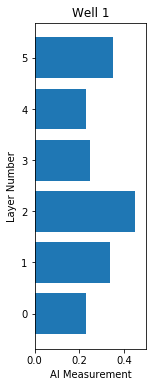

In [62]:
fig = l.plot()

In [63]:
type(fig)

NoneType

<hr />

<div>
<img src="https://avatars1.githubusercontent.com/u/1692321?s=50"><p style="text-align:center">© Agile Geoscience 2019</p>
</div>